In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Activation,Input,Embedding, Reshape,Concatenate,Conv1D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau 
from keras.layers import MaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [0]:
linktest = 'https://drive.google.com/open?id=1uvYUtvCijFRf1fYrHVaROWjzYTOLX6vW'
linktrain = 'https://drive.google.com/open?id=1-Aaq0hjes3nQ7E6AmNgx3O8qOn30jDnD'

In [0]:
fluff1, id1 = linktrain.split('=')
fluff2, id2 = linktest.split('=')
print (id1, id2) # Verify that you have everything after '='

1-Aaq0hjes3nQ7E6AmNgx3O8qOn30jDnD 1uvYUtvCijFRf1fYrHVaROWjzYTOLX6vW


In [0]:
downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('TrainCSV.csv')  
train = pd.read_csv('TrainCSV.csv')

In [0]:
downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('TestCSV.csv')  
test = pd.read_csv('TestCSV.csv')
# Test Dataset is now stored in a Pandas Dataframe

In [0]:
Y_train = train["Class"]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


46    850
14    850
13    850
44    850
12    850
43    850
11    850
42    850
10    850
41    850
9     850
40    850
8     850
39    850
7     850
38    850
6     850
37    850
5     850
36    850
4     850
35    850
3     850
34    850
2     850
33    850
1     850
45    850
32    850
30    850
15    850
29    850
28    850
27    850
26    850
57    850
25    850
56    850
24    850
55    850
23    850
54    850
22    850
53    850
21    850
52    850
20    850
51    850
19    850
50    850
18    850
49    850
17    850
48    850
16    850
47    850
31    849
Name: Class, dtype: int64

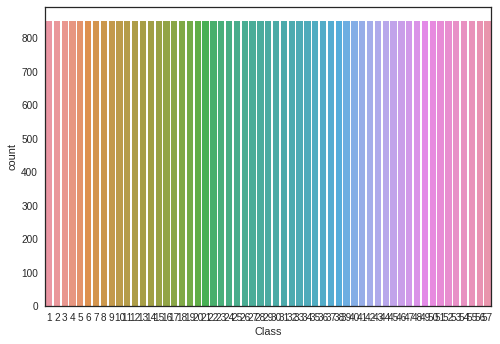

In [0]:
verify = test["Class"]
verify1 = test["Class"]
test = test.drop(labels = ["Class"], axis = 1)

# Drop 'label' column
X_train = train.drop(labels = ["Class"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [0]:
X_train.isnull().any().describe()

count      1024
unique        1
top       False
freq       1024
dtype: object

In [0]:
X_train = X_train / 255.0
test = test / 255.0

In [0]:
X_train = X_train.values.reshape(-1,32,32,1)
test = test.values.reshape(-1,32,32,1)

In [0]:
Y_train = to_categorical(Y_train, num_classes = 58)

In [0]:
verify=to_categorical(verify, num_classes = 58)

In [0]:
random_seed = 2

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

<class 'numpy.ndarray'>


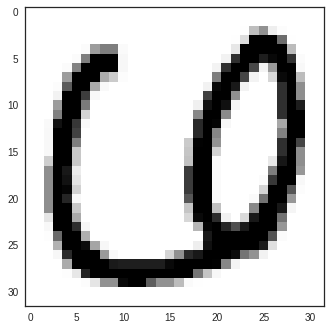

In [0]:
g = plt.imshow(X_train[1230][:,:,0])
print(type(X_train[1230][:,:,0]))

In [0]:
input_shape = (32, 32, 1)
model = Sequential()

# CNN model - Building the model suggested in paper

model.add(Conv2D(filters= 32, kernel_size =(5,5), padding='same', name='conv1',input_shape=input_shape)) #96
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), name='pool1'))

model.add(Conv2D(filters= 64, kernel_size =(3,3), padding='same', name='conv2'))  #256
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), name='pool2'))

model.add(Conv2D(filters= 128, kernel_size =(3,3), padding='same', name='conv3'))  #256
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(512, name='dense1'))  #1024
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256, name='dense2'))  #1024
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(58,name='output'))
model.add(Activation('softmax'))  #softmax since output is within 50 classes



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [0]:
datagen.fit(X_train)
batch_size=128

In [0]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 200, validation_data=(X_train, Y_train),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
 - 22s - loss: 1.9493 - acc: 0.4574 - val_loss: 0.3891 - val_acc: 0.8574
Epoch 2/300
 - 17s - loss: 0.5694 - acc: 0.8056 - val_loss: 0.2277 - val_acc: 0.9199
Epoch 3/300
 - 17s - loss: 0.3965 - acc: 0.8625 - val_loss: 0.1824 - val_acc: 0.9338
Epoch 4/300
 - 17s - loss: 0.3287 - acc: 0.8878 - val_loss: 0.1588 - val_acc: 0.9436
Epoch 5/300
 - 18s - loss: 0.2830 - acc: 0.9004 - val_loss: 0.1480 - val_acc: 0.9451
Epoch 6/300
 - 18s - loss: 0.2537 - acc: 0.9108 - val_loss: 0.1511 - val_acc: 0.9419
Epoch 7/300
 - 17s - loss: 0.2359 - acc: 0.9169 - val_loss: 0.1310 - val_acc: 0.9509
Epoch 8/300
 - 17s - loss: 0.2235 - acc: 0.9215 - val_loss: 0.1233 - val_acc: 0.9550
Epoch 9/300
 - 18s - loss: 0.2100 - acc: 0.9256 - val_loss: 0.1167 - val_acc: 0.9582
Epoch 10/300
 - 17s - loss: 0.1964 - acc: 0.9303 - val_loss: 0.1103 - val_acc: 0.9597
Epoch 11/300
 - 17s - loss: 0.1923 - acc: 0.9333 - val_loss: 0.1099 - val_acc: 0.9578
Epoch 12/300
 -

In [0]:
# predict results
results = model.predict(test)

In [0]:
# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Class")

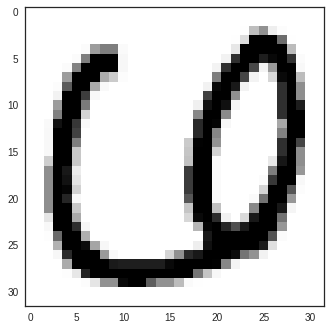

In [0]:
image1 = X_train[1230][:,:,0]
plt.imshow(image1)

In [0]:
import keras.backend as K
def _evaluate(model, nodes_to_evaluate, x, y=None):
    symb_inputs = (model._feed_inputs + model._feed_targets + model._feed_sample_weights)
    f = K.function(symb_inputs, nodes_to_evaluate)
    x_, y_, sample_weight_ = model._standardize_user_data(x, y)
    return f(x_ + y_ + sample_weight_)
  
def get_activations(model, x, layer_name=None):
    nodes = [layer.output for layer in model.layers if layer.name == layer_name or layer_name is None]
    # we process the placeholders later (Inputs node in Keras). Because there's a bug in Tensorflow.
    input_layer_outputs, layer_outputs = [], []
    [input_layer_outputs.append(node) if 'input_' in node.name else layer_outputs.append(node) for node in nodes]
    activations = _evaluate(model, layer_outputs, x, y=None)
    activations_dict = dict(zip([output.name for output in layer_outputs], activations))
    activations_inputs_dict = dict(zip([output.name for output in input_layer_outputs], x))
    result = activations_inputs_dict.copy()
    result.update(activations_dict)
    return result
  
def get_activations1(model, x, layer_name=None):
    nodes = [layer.input for layer in model.layers if layer.name == layer_name or layer_name is None]
    # we process the placeholders later (Inputs node in Keras). Because there's a bug in Tensorflow.
    input_layer_inputs, layer_inputs = [], []
    [input_layer_inputs.append(node) if 'input_' in node.name else layer_inputs.append(node) for node in nodes]
    activations = _evaluate(model, layer_inputs, x, y=None)
    activations_dict = dict(zip([input.name for input in layer_inputs], activations))
    activations_inputs_dict = dict(zip([input.name for input in input_layer_inputs], x))
    result = activations_inputs_dict.copy()
    result.update(activations_dict)
    return result

In [0]:
def display_activations(activations):
    import matplotlib.pyplot as plt
    max_rows = 8
    max_columns = 8
    for layer_name, first in activations.items():
        print(layer_name, first.shape, end=' ')
        if first.shape[0] != 1:
            print('-> Skipped. First dimension is not 1.')
            continue
        if len(first.shape) <= 2:
            print('-> Skipped. 2D Activations.')
            continue
        print('')
        fig = plt.figure(figsize=(12, 12))
        plt.axis('off')
        plt.title(layer_name)
        for i in range(1, min(max_columns * max_rows + 1, first.shape[-1] + 1)):
            img = first[0, :, :, i - 1]
            fig.add_subplot(max_rows, max_columns, i)
            plt.imshow(img,cmap='gray')
            plt.axis('off')
        plt.show()

In [0]:
activations=get_activations(model, X_train[15600:15601])

conv1/BiasAdd:0 (1, 32, 32, 32) 


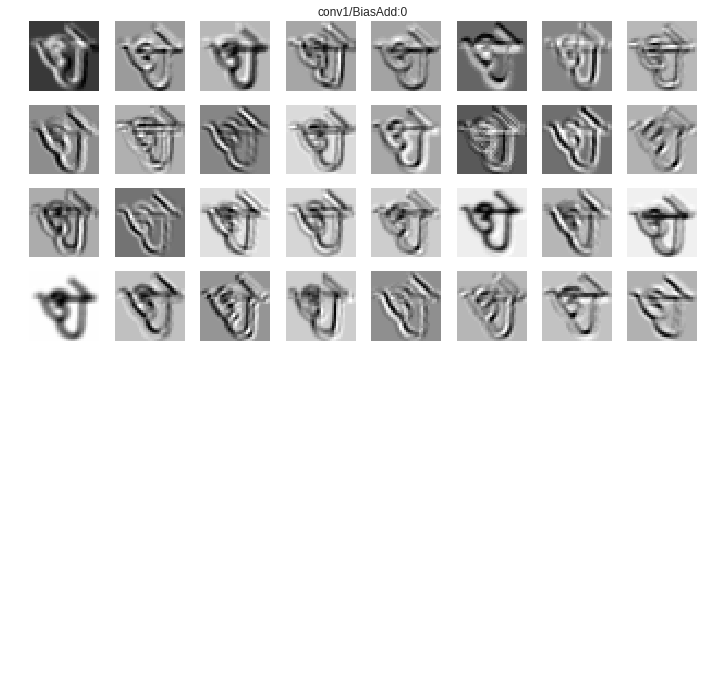

activation_1/Relu:0 (1, 32, 32, 32) 


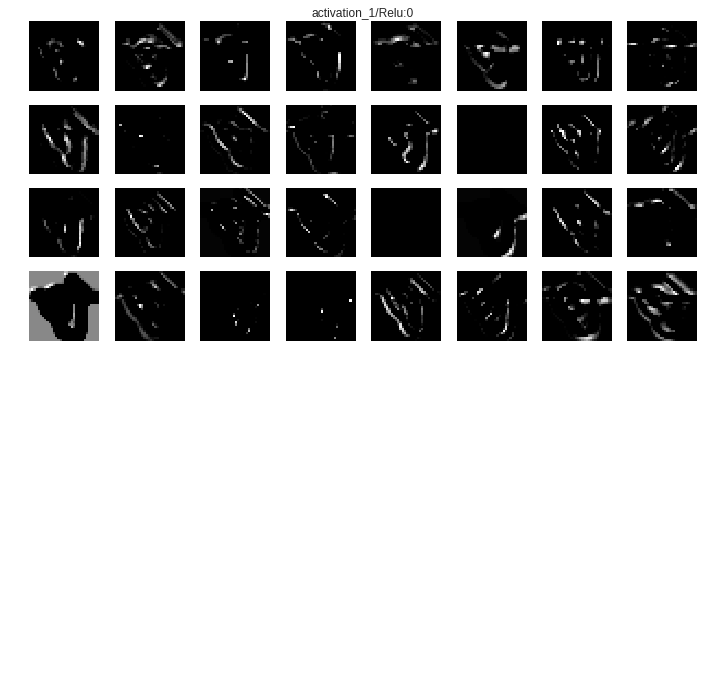

pool1/MaxPool:0 (1, 16, 16, 32) 


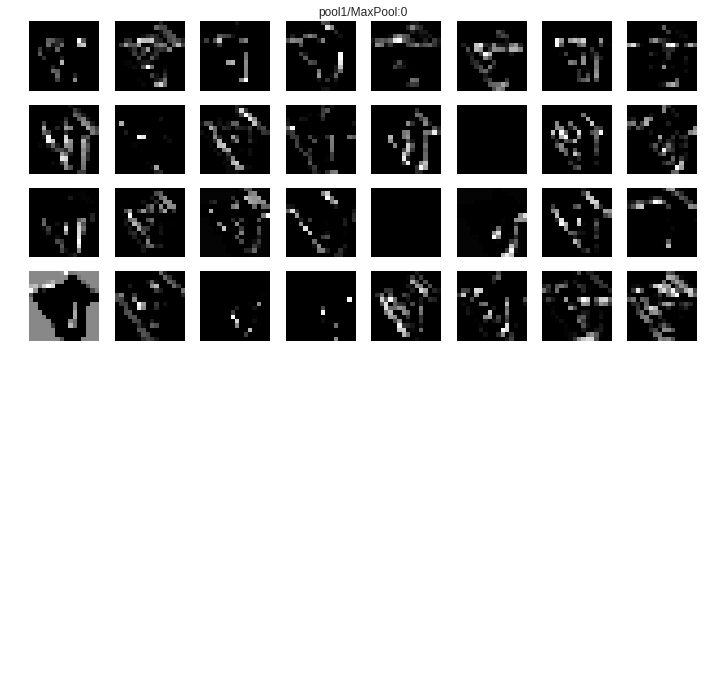

conv2/BiasAdd:0 (1, 16, 16, 64) 


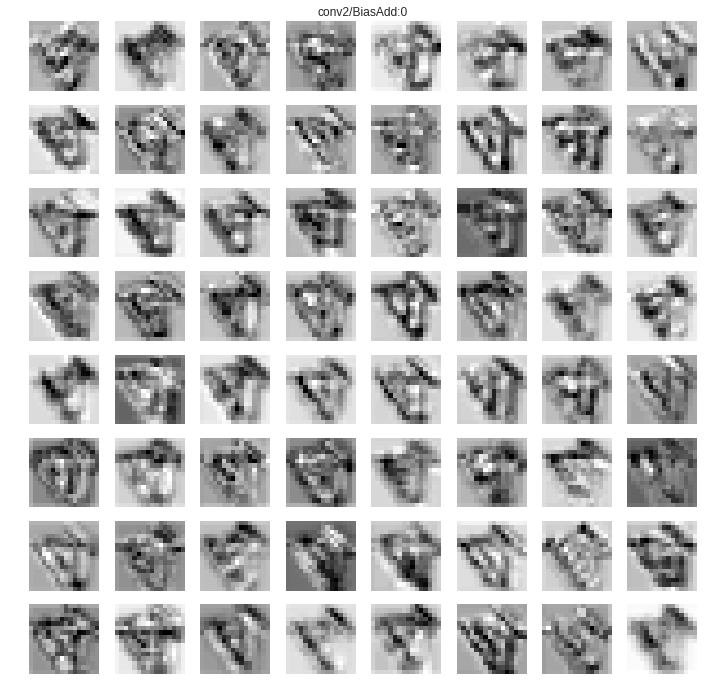

activation_2/Relu:0 (1, 16, 16, 64) 


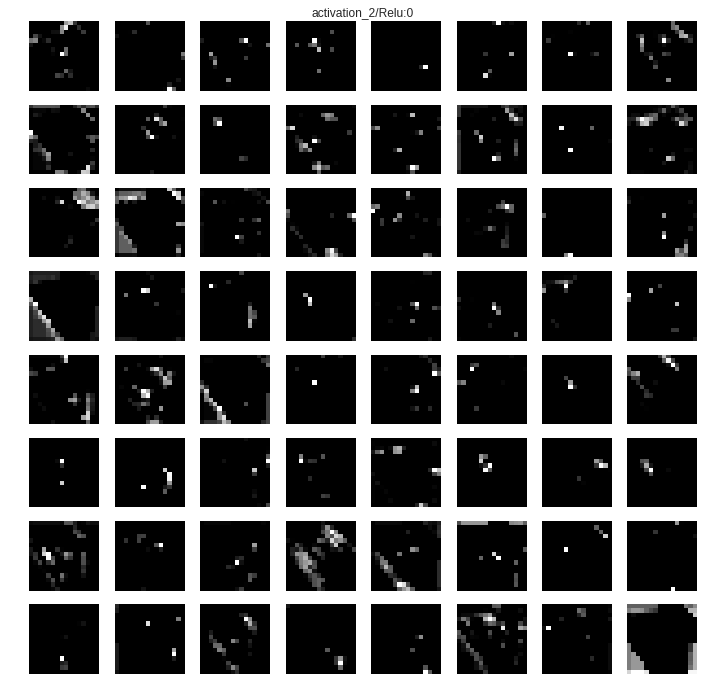

pool2/MaxPool:0 (1, 8, 8, 64) 


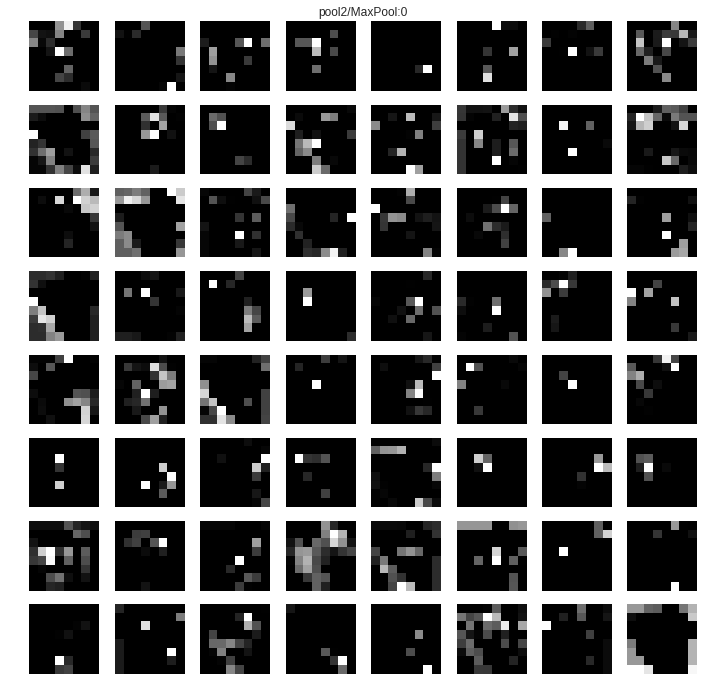

conv3/BiasAdd:0 (1, 8, 8, 128) 


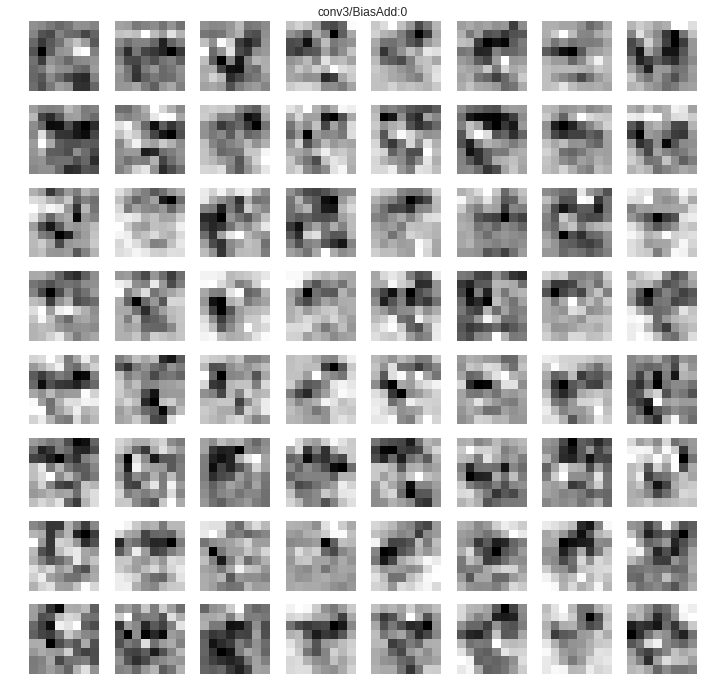

activation_3/Relu:0 (1, 8, 8, 128) 


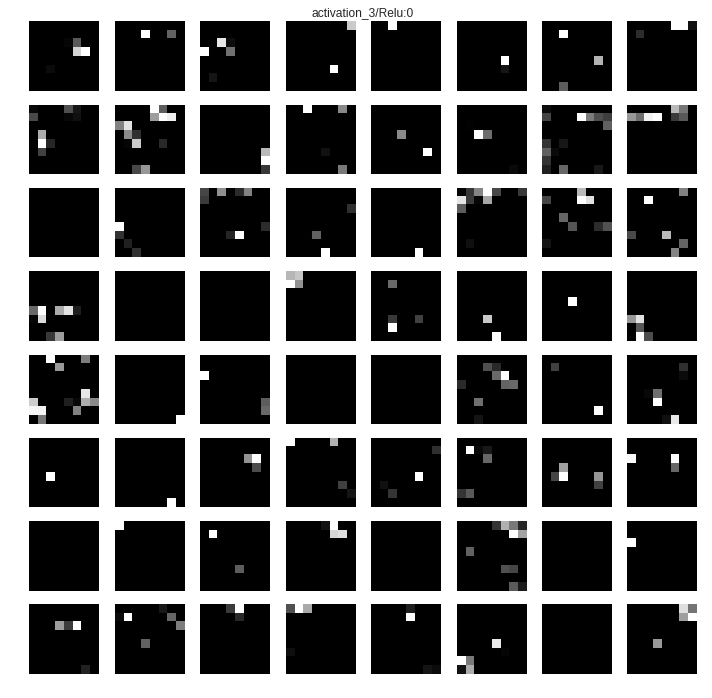

pool3/MaxPool:0 (1, 4, 4, 128) 


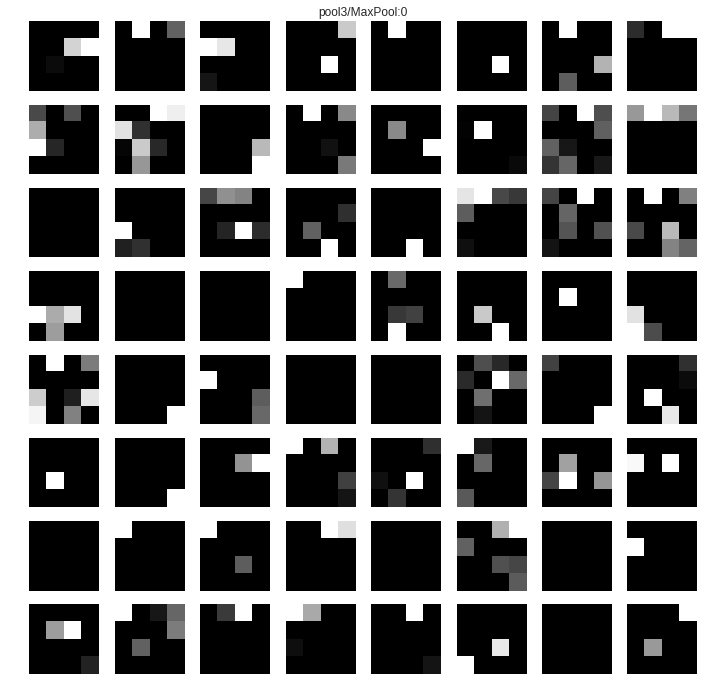

flatten_1/Reshape:0 (1, 2048) -> Skipped. 2D Activations.
dropout_1/cond/Merge:0 (1, 2048) -> Skipped. 2D Activations.
dense1/BiasAdd:0 (1, 512) -> Skipped. 2D Activations.
activation_4/Relu:0 (1, 512) -> Skipped. 2D Activations.
dropout_2/cond/Merge:0 (1, 512) -> Skipped. 2D Activations.
dense2/BiasAdd:0 (1, 256) -> Skipped. 2D Activations.
activation_5/Relu:0 (1, 256) -> Skipped. 2D Activations.
dropout_3/cond/Merge:0 (1, 256) -> Skipped. 2D Activations.
output/BiasAdd:0 (1, 58) -> Skipped. 2D Activations.
activation_6/Softmax:0 (1, 58) -> Skipped. 2D Activations.


In [0]:
display_activations(activations)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 128)         73856     
__________

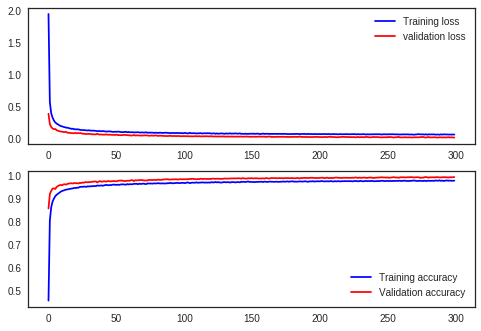

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

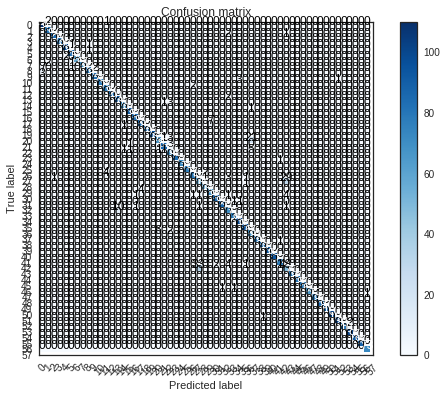

In [0]:
# Look at confusion matrix  VALIDATION

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(58))

In [0]:
print(type(verify))

<class 'numpy.ndarray'>


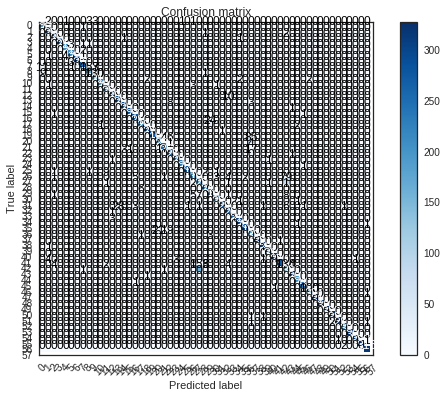

In [0]:
# Look at confusion matrix  TESTDATA

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_predt = model.predict(test)
# Convert predictions classes to one hot vectors 
Y_pred_classest = np.argmax(Y_predt,axis = 1) 
# Convert validation observations to one hot vectors
Y_truet = np.argmax(verify,axis = 1) 
# compute the confusion matrix
confusion_mtxt = confusion_matrix(Y_truet, Y_pred_classest) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtxt, classes = range(58))

In [0]:
for i in range(0,len(confusion_mtxt)):
  print(confusion_mtxt[i])

[198   2   0   0   1   0   0   0   3   3   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
[  0 285   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
[  0   0 296   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
[  0   0   0 294   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0]
[  0   0   0   0 211   3   0   1   1   0   0   0   0   0   0   0   0

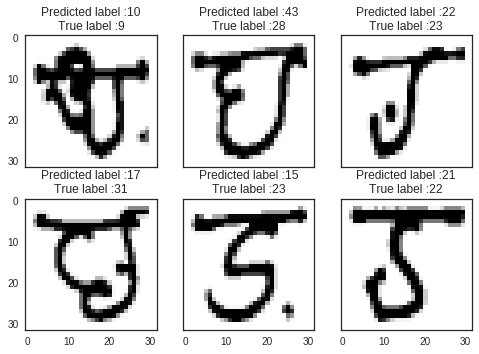

In [0]:
# Display some error results  VALIDATION

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [0]:
# Display some error results  TESTING DATA

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classest - Y_truet != 0)

Y_pred_classes_errors = Y_pred_classest[errors]
Y_pred_errors = Y_predt[errors]
Y_true_errors = Y_truet[errors]
X_val_errors = test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)



In [0]:

S = results.size
ctr = 0
#print(verify.size)

for i in range(S):
  if verify1[i] == results[i]:
    ctr = ctr + 1;
  else:
    temp = i
    
    
misclass = S-ctr
print("Misclassified = "+str(misclass))
acc = ctr/S*100
print("Accuracy = "+str(acc))

Misclassified = 627
Accuracy = 95.94463488778217


In [0]:
devchar = {0:"अ",
           1:"आ",
           2:"इ",
           3:"उ",
           4:"ए",
           5:"ऐ",
           6:"ओ",
           7:"औ",
           8:"अं",
           9:"अः",
           10: "क",
           11: "ख",
           12:"ग",
           13:"घ",
           14:"ङ",
           15:"च",
           16:"छ",
           17:"ज",
           18:"झ",
           19:"ञ",
           20:"ट",
           21:"ठ",
           22:"ड",
           23:"ढ",
           24:"ण",
           25:"त",
           26:"थ",
           27:"द",
           28:"ध",
           29:"न",
           30:"प",
           31:"फ",
           32:"ब",
           33:"भ",
           34:"म",
           35:"य",
           36:"र",
           37:"ल",
           38:"व",
           39:"श",
           40:"ष",
           41:"स",
           42:"ह",
           43:"ळ",
           44:"क्ष",
           45:"ज्ञ",
           46:"श्र",
           47:"०",
           48:"१",
           49:"२",
           50:"३",
           51:"४",
           52:"५",
           53:"६",
           54:"७",
           55:"८",
           56:"९"}


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import re
from PIL import Image as PImage

from datetime import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
def show_image(image):
    # Plots image
    assert len(image.shape) == 3, "Image passed in is of incorrect shape"
    plt.imshow(image.squeeze())
    plt.show()

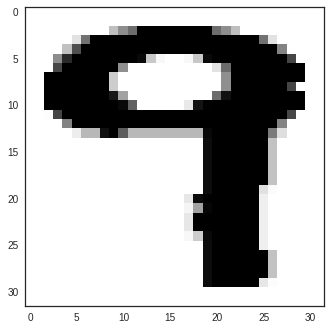

Predicted Label Class =  49
Predicted Character =  १
<class 'numpy.ndarray'>


In [0]:
S = results.size
im = np.random.randint(0,S)
show_image(test[im])
print("Predicted Label Class = ",results[im])
print("Predicted Character = ",devchar[results[im]-1])
print(type(test[im]))

In [0]:
model.save('keras.h5')
#del model

In [0]:
from tensorflow.python.keras.models import load_model
import matplotlib.pyplot as plt

In [0]:
model = load_model('keras.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  name=fn
print(fn)

Saving 11.png to 11 (1).png
11.png


In [0]:
import cv2
import numpy as np

BLACK = [0,0,0]

def get_square(image,square_size):
    height,width=image.shape
    if(height>width):
      differ=height
    else:
      differ=width
    differ+=4

    mask = np.zeros((differ,differ), dtype="uint8")   
    x_pos=int((differ-width)/2)
    y_pos=int((differ-height)/2)
    mask[y_pos:y_pos+height,x_pos:x_pos+width]=image[0:height,0:width]
    mask=cv2.resize(mask,(square_size,square_size),interpolation=cv2.INTER_AREA)

    return mask 


def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes), key=lambda b: b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)


img = cv2.imread(fn)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2.imshow('gray', gray)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
#cv2.imshow('thresh', thresh)

img_bin = 255-thresh  # Invert the image

#img_bin = cv2.erode(img_bin,np.ones((1,1),np.uint8),iterations = 1)
img_bin_actual = cv2.dilate(img_bin,np.ones((2,2),np.uint8),iterations = 2)

#thresh = cv2.dilate(img_bin,np.ones((3,3),np.uint8),iterations = 4)
thresh = img_bin_actual

cv2.imwrite('Dilated15.png', thresh)
#cv2.imshow("Dilated",thresh)
#cv2.waitKey(0)


_,ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
(sorted_ctrs, boundingBoxes) = sort_contours(ctrs,method="top-to-bottom")


img_bin_actual = cv2.erode(img_bin_actual,np.ones((2,2),np.uint8),iterations = 1)
thresh = img_bin_actual
area1=[]
x1=[];y1=[];w1=[];h1=[]
for k, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    area1.append(w*h)
    x1.append(x)
    y1.append(y)
    h1.append(h)
    w1.append(w)
maxin=area1.index(max(area1))
print(area1,maxin)
rect = cv2.rectangle(img, (x1[maxin], y1[maxin]), (x1[maxin] + w1[maxin], y1[maxin] + h1[maxin]), (0, 255, 0), 2)
new_img = thresh[y1[maxin]:y1[maxin]+h1[maxin],x1[maxin]:x1[maxin]+w1[maxin]]
new_img = cv2.resize(new_img,(28,28), interpolation = cv2.INTER_AREA)
new_img = get_square(new_img,32)

cv2.drawContours(img, sorted_ctrs, -1, (0, 0, 255), 0)
cv2.imwrite("Contours.jpg", img)

[1519, 171] 0


True

In [0]:
import cv2
new_img = cv2.imread('b58.png',0)
#print(type(img1))
#plt.imshow(img1)


48
Predicted Label Class =  48
Predicted Character =  ०


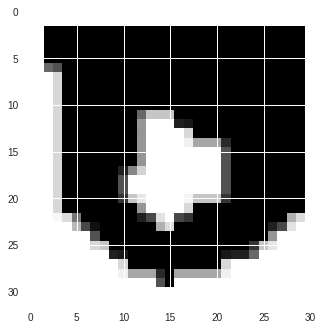

In [0]:
import pandas as pd
plt.imshow(new_img)
img1=pd.DataFrame(new_img)
img1 = img1.values.reshape(-1,32,32,1)

prediction = model.predict_classes(img1)
pl=prediction.tolist()
print(pl[0])
print("Predicted Label Class = ",pl[0])
print("Predicted Character = ",devchar[pl[0]-1])

In [0]:
path_model = 'model.keras'

In [0]:
model.save(path_model)

In [0]:
del model

In [0]:
from tensorflow.python.keras.models import load_model
model = load_model('keras.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras.models import load_model
from keras import backend as K
import os.path as osp
import os
model = load_model('keras.h5')

ip=[node.op.name for node in model.inputs]
op=[node.op.name for node in model.outputs]
print(ip,op)
nb_classes = 58 # The number of output nodes in the model
prefix_output_node_names_of_final_network = 'output_node'

K.set_learning_phase(0)

pred = [None]*nb_classes
pred_node_names = [None]*nb_classes
for i in range(nb_classes):
    pred_node_names[i] = prefix_output_node_names_of_final_network+str(i)
    pred[i] = tf.identity(model.output[i], name=pred_node_names[i])
print('output nodes names are: ', pred_node_names)

sess = K.get_session()
output_fld = 'tensorflow_model/'
if not os.path.isdir(output_fld):
    os.mkdir(output_fld)
output_graph_name = 'model' + '.pb'
output_graph_suffix = '_inference'

constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
graph_io.write_graph(constant_graph, output_fld, output_graph_name, as_text=False)
print('saved the constant graph (ready for inference) at: ', osp.join(output_fld, output_graph_name))


In [0]:
def print_graph_nodes(filename):
    import tensorflow as tf
    g = tf.GraphDef()
    g.ParseFromString(open(filename, 'rb').read())
    print()
    print(filename)
    print("=======================INPUT=========================")
    print([n for n in g.node if n.name.find('input') != -1])
    print("=======================OUTPUT========================")
    print([n for n in g.node if n.name.find('output') != -1])
    print("===================KERAS_LEARNING=====================")
    print([n for n in g.node if n.name.find('keras_learning_phase') != -1])
    print("======================================================")
    print()

In [0]:
print_graph_nodes('tensorflow_model/model.pb')

In [0]:

ip=[node.op.name for node in model.inputs]
op=[node.op.name for node in model.outputs]

In [0]:
print(ip,op)

['conv1_input_2'] ['activation_6_2/Softmax']


In [0]:
import tensorflow as tf

localpb = 'tensorflow_model/model.pb'
tflite_file = 'model.lite'

print("{} -> {}".format(localpb, tflite_file))

converter = tf.lite.TFLiteConverter.from_frozen_graph(
    localpb, 
    input, 
    output
)

tflite_model = converter.convert()

open(tflite_file,'wb').write(tflite_model)

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

In [0]:
import tensorflow as tf
from keras import backend as K
from tensorflow.python.tools import freeze_graph
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.python.tools import optimize_for_inference_lib
MODEL_NAME = 'MODI_Clssification'
def export_model(saver, model, input_node_names, output_node_name):
    tf.train.write_graph(K.get_session().graph_def, 'out', \
        MODEL_NAME + '_graph.pbtxt')

    saver.save(K.get_session(), 'out/' + MODEL_NAME + '.chkp')

    freeze_graph.freeze_graph('out/' + MODEL_NAME + '_graph.pbtxt', None, \
        False, 'out/' + MODEL_NAME + '.chkp', output_node_name, \
        "save/restore_all", "save/Const:0", \
        'out/frozen_' + MODEL_NAME + '.pb', True, "")

    input_graph_def = tf.GraphDef()
    with tf.gfile.Open('out/frozen_' + MODEL_NAME + '.pb', "rb") as f:
        input_graph_def.ParseFromString(f.read())

    output_graph_def = optimize_for_inference_lib.optimize_for_inference(
            input_graph_def, input_node_names, [output_node_name],
            tf.float32.as_datatype_enum)

    with tf.gfile.FastGFile('out/opt_' + MODEL_NAME + '.pb', "wb") as f:
        f.write(output_graph_def.SerializeToString())

    print("graph saved!")


In [0]:
export_model(tf.train.Saver(), model,ip, op)

In [0]:
from tensorflow.contrib import lite
converter = lite.TFLiteConverter.from_keras_model_file( 'keras.h5')
tfmodel = converter.convert()
open ("model.tflite" , "wb") .write(tfmodel)

INFO:tensorflow:Froze 12 variables.
INFO:tensorflow:Converted 12 variables to const ops.


5156928

In [0]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)